# Previsão de Importação

Aqui é onde os testes e as previsões se juntam para formar o relatório final, aqui chamado de 'result_final'.

In [127]:
agg=1
%run '~/comex/code/009.ipynb'

#### Importando bibliotecas python

In [128]:
##### Computação cietífica
import numpy as np
##### Manipulação e análise
import pandas as pd
##### Análise exploratória visual
import matplotlib.pyplot as plt
import seaborn as sns
##### Seleção de modelos 
from sklearn.model_selection import train_test_split as tts
##### Análise preditiva
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import RandomForestRegressor as rfr
##### Métricas dos resultados
from sklearn import metrics
##### Outros
import warnings
# desligando avisos do sistema
warnings.filterwarnings("ignore")
# Determina o número de repetição dos testes
trials=5
# Inicia RFs  e GSC
rfc=rfc()
rfr=rfr()
# Lê arquivo com histórico de importação de fertilizantes já selecionado, limpo, validado, segementado e
# agrupado no tempo
i_o=pd.read_csv('~/comex/data/imp5.csv')

In [129]:
# Identifica o último mês do histórico
um=i_o.MES.iloc[-1]

# Cria DF para receber os resultados dos testes de classificação e regressão
metrics_classif_g=pd.DataFrame()
metrics_regress_g=pd.DataFrame()


# Cria 
pred_classif_g=pd.DataFrame()
pred_regress_g=pd.DataFrame()

In [130]:
tpr_g_t=pd.DataFrame()
tpc_g_t=pd.DataFrame()

for g in [1,2,3]:
    
    for t in range(trials):

        i=i_o[i_o.grupo_mes==g].drop(columns='grupo_mes')
        
        # Identifica as variáveis
        %run '~/comex/code/010.ipynb'
        
        # Teste de Classificação
        %run '~/comex/code/011.ipynb'
        
        tpc_g_t=pd.concat([tpc_g_t,tpc.assign(grupo_mes=g).assign(trial=t)])
        
        metrics_classif_g=pd.concat([metrics_classif_g,metrics_classif])
        
        %run '~/comex/code/012.ipynb'
        
        tpr_g_t=pd.concat([tpr_g_t,tpr.assign(grupo_mes=g).assign(trial=t)])
        
        metrics_regress_g=pd.concat([metrics_regress_g,metrics_regress])
        
    %run '~/comex/code/013.ipynb'
    %run '~/comex/code/014.ipynb'
    
    
    pred_classif_g=pd.concat([pred_classif_g,pred_classif.assign(grupo_mes=g)])
    pred_regress_g=pd.concat([pred_regress_g,pred_regress.assign(grupo_mes=g)])

%store tpr_g_t
%store tpc_g_t

Stored 'tpr_g_t' (DataFrame)
Stored 'tpc_g_t' (DataFrame)


Ocorrências de Importação

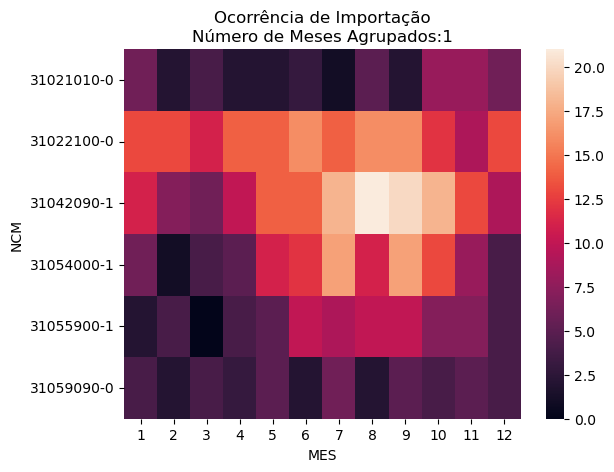

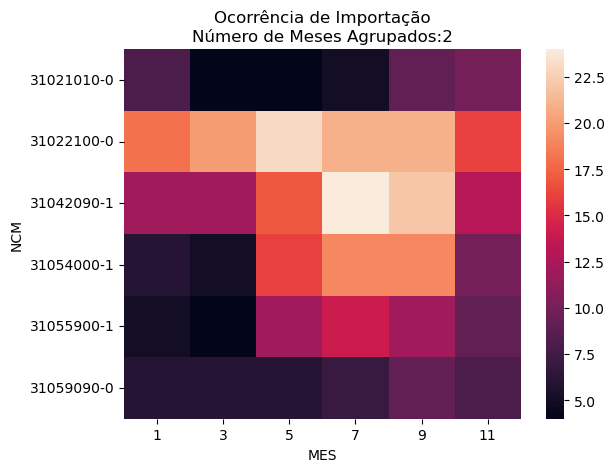

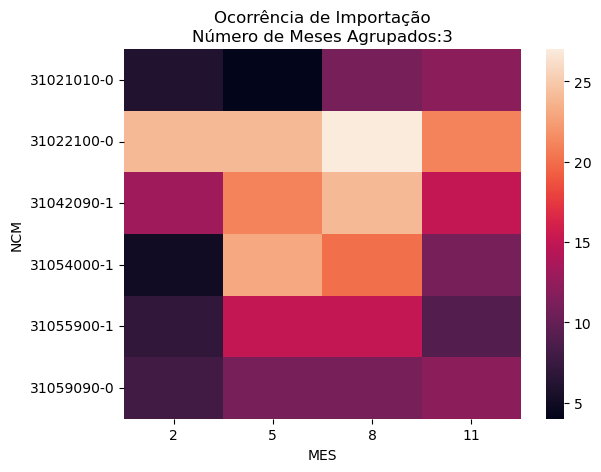

In [131]:
%run '~/comex/code/Visualiza teste classif.ipynb'

#### A seguir é apresentada uma amostra randômica em formato visual dos testes quantitativos realizados

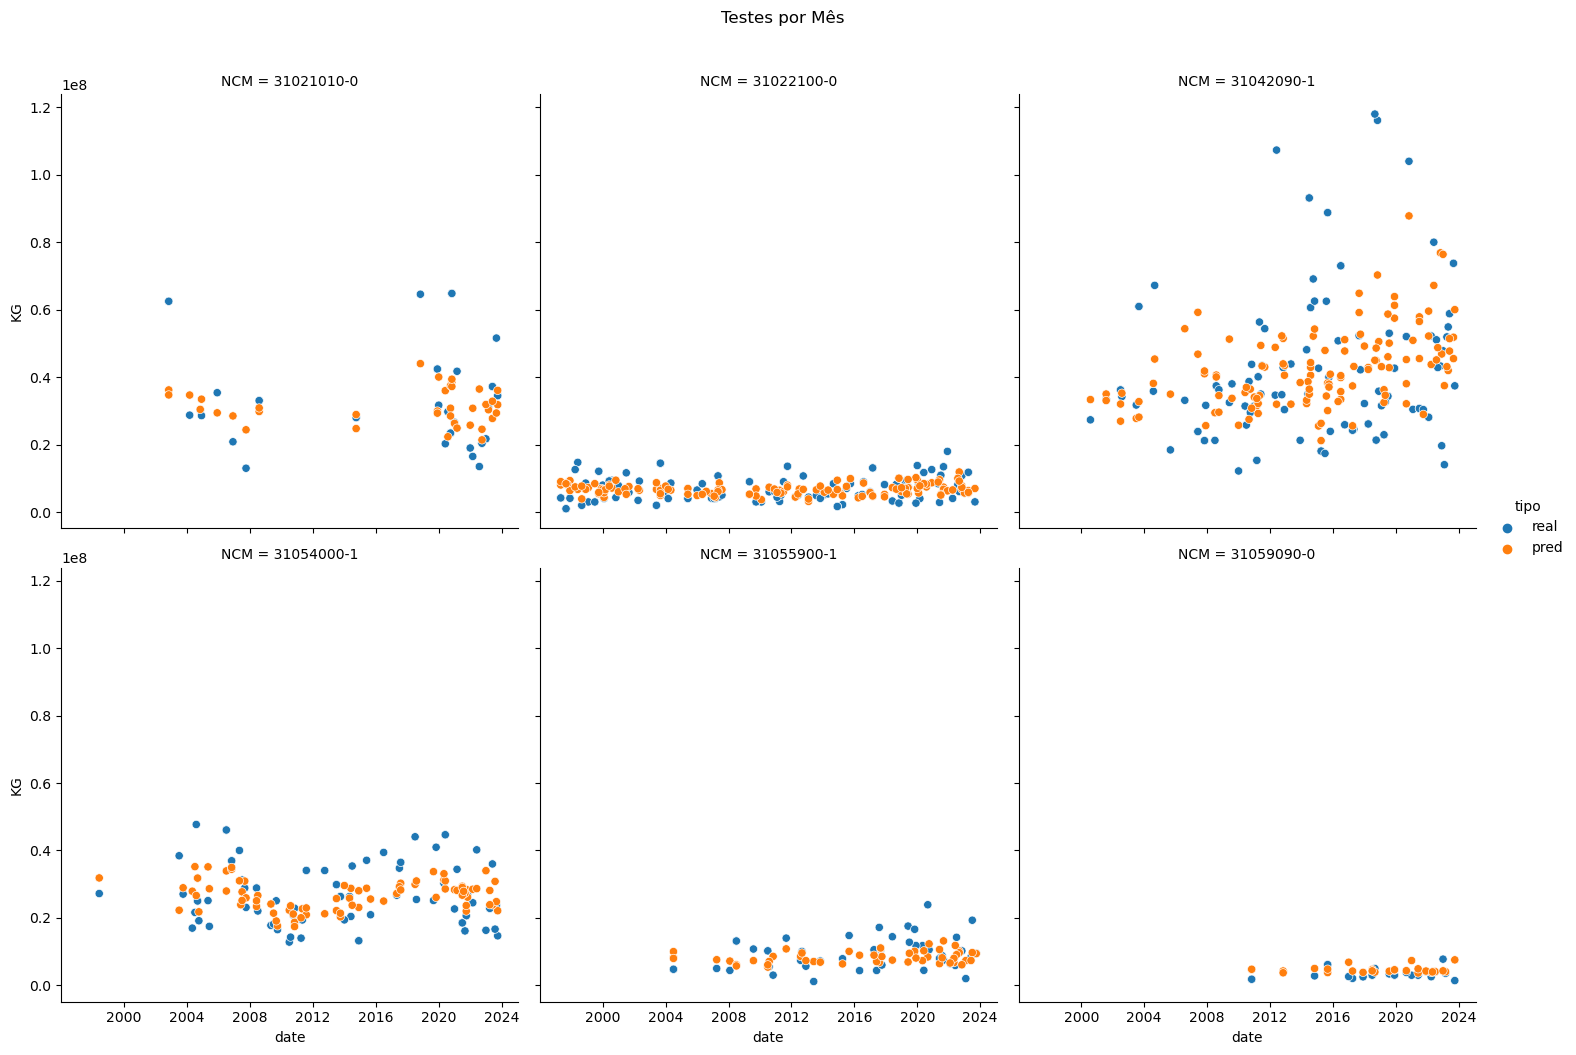

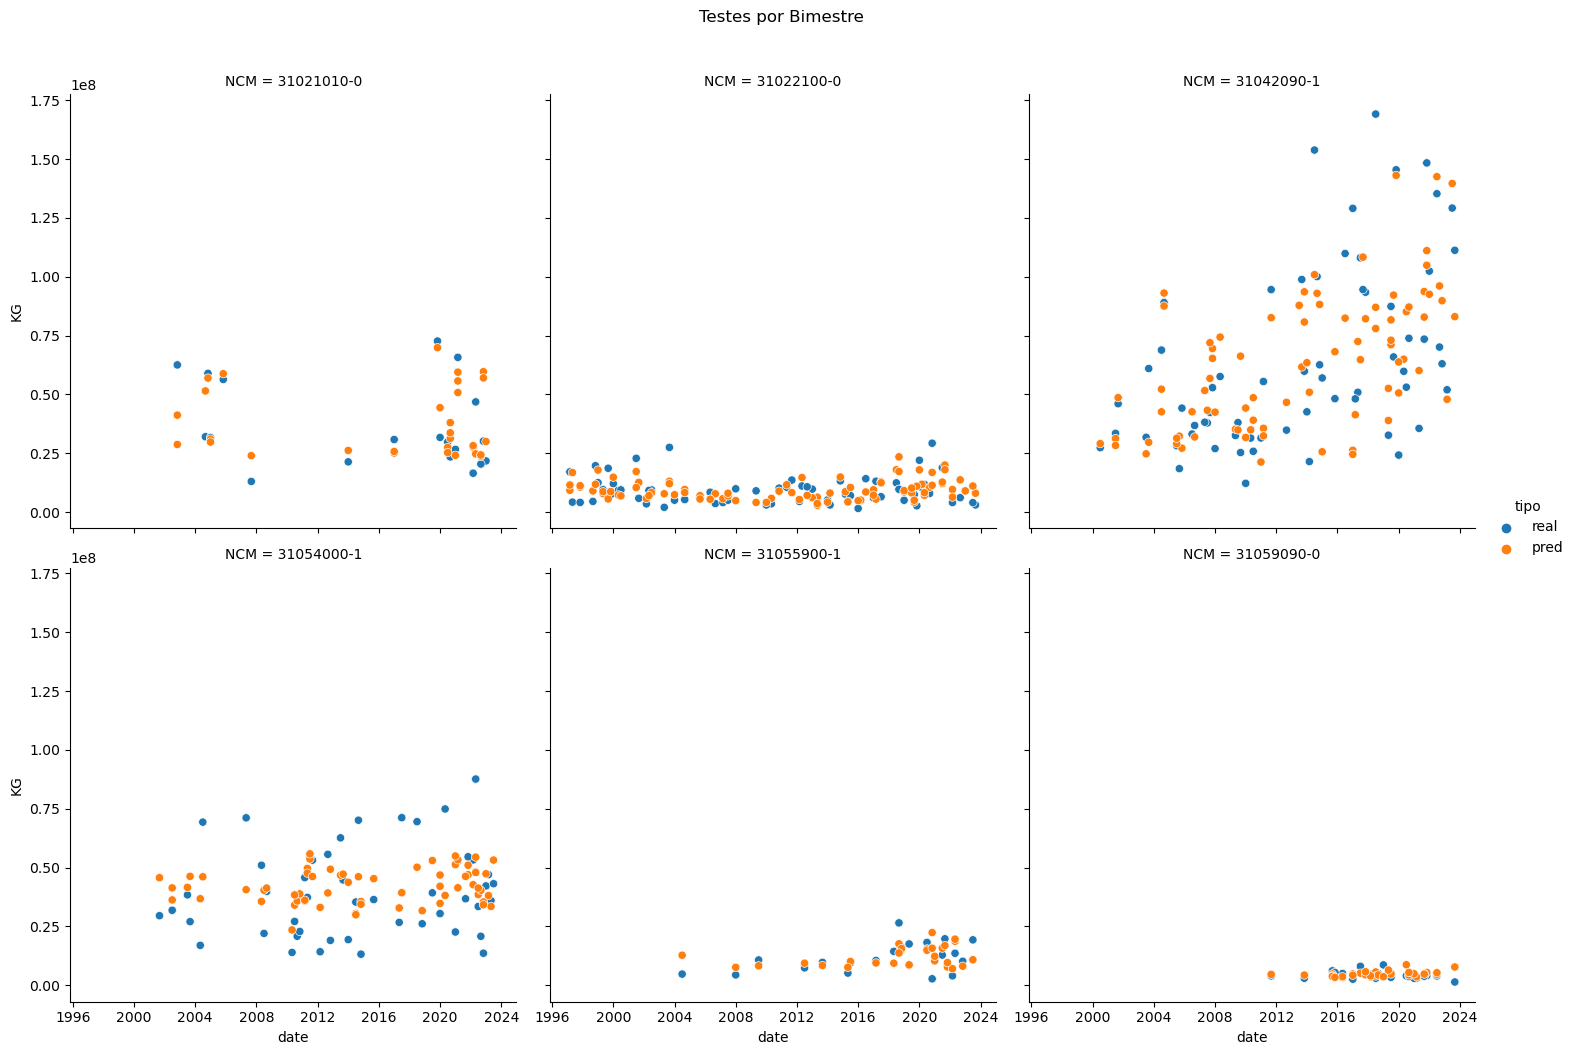

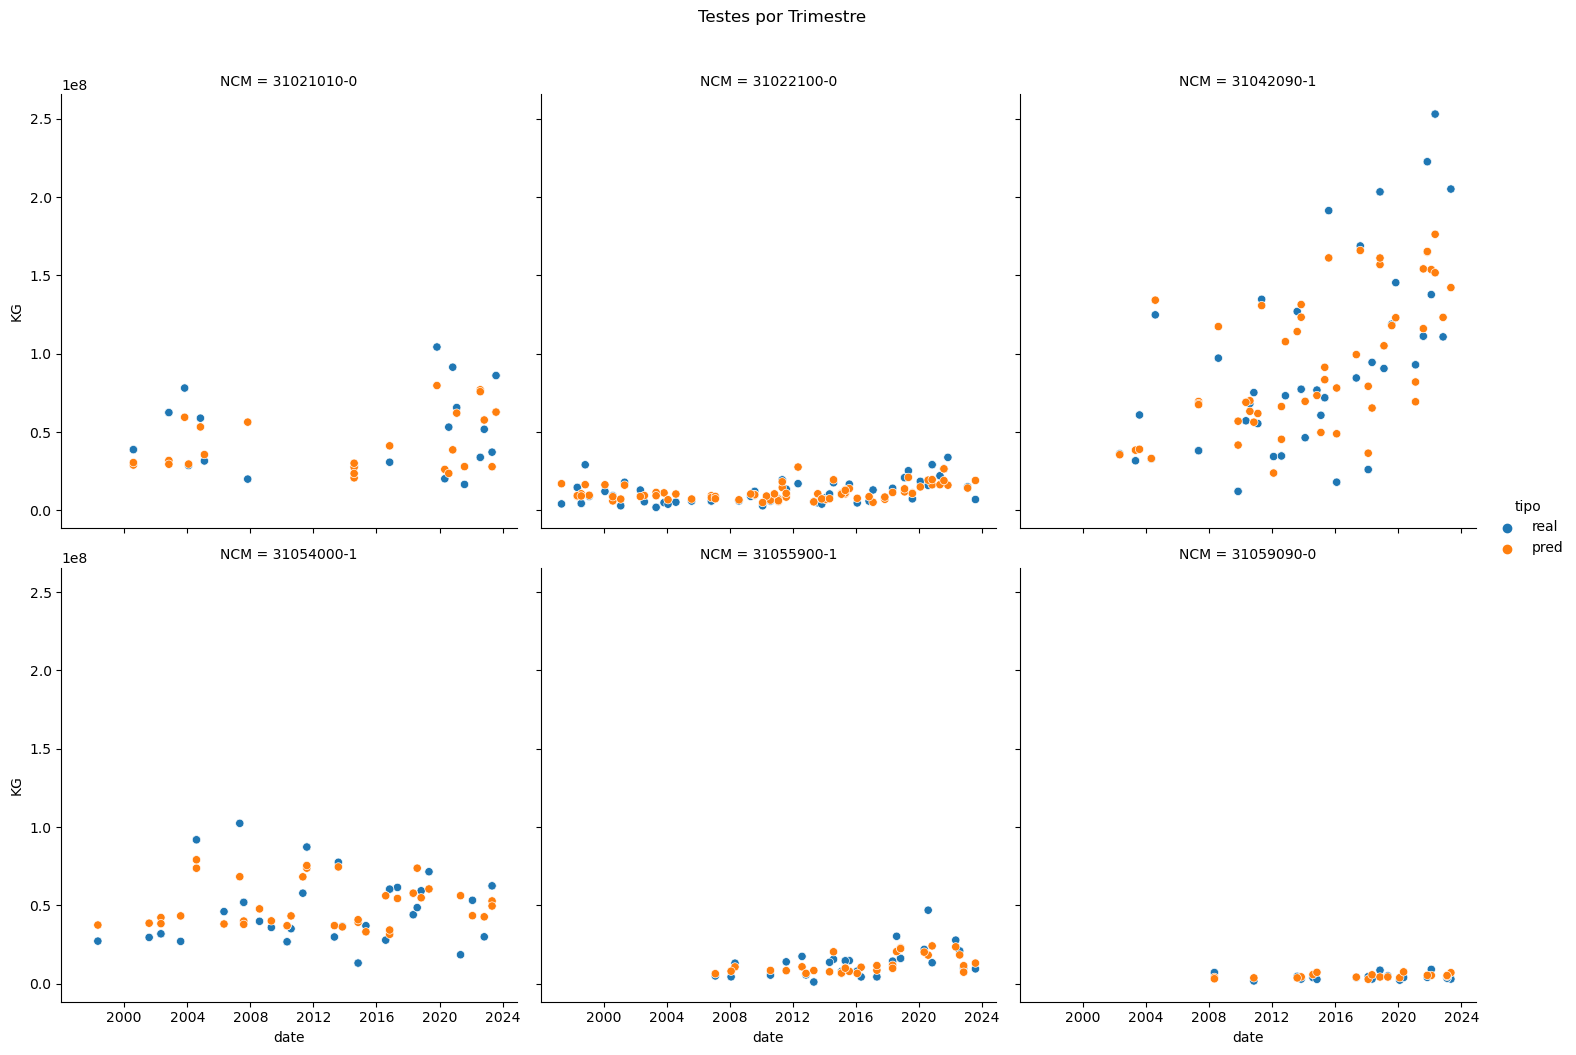

In [132]:
%run '~/comex/code/Visualiza teste regress.ipynb'

In [133]:
metrics_classif_g=metrics_classif_g[(metrics_classif_g.recall>=0)&(metrics_classif_g.precision>=0)]
metrics_regress_g=metrics_regress_g[metrics_regress_g.r2>=0]

In [134]:
# Média dos trials
metrics_classif_mean=metrics_classif_g.groupby(by=['NCM','MES','grupo_mes'])[['recall','precision']].mean().reset_index()
metrics_regress_mean=metrics_regress_g.groupby(by=['NCM','MES','grupo_mes'])[['r2']]                .mean().reset_index()        

In [135]:
result_final=pred_classif_g.merge(metrics_classif_mean,how='outer').merge(pred_regress_g,how='outer').merge(metrics_regress_mean,how='outer')

In [136]:
result_final['KT']=(result_final.KG_pred/10**6)#.astype(int)

In [137]:
result_final.date=result_final.date.astype('datetime64[ns]')
result_final.date.unique()

array(['2023-11-01T00:00:00.000000000',                           'NaT'],
      dtype='datetime64[ns]')

In [138]:
result_final=pd.concat([
    result_final[result_final.oc_pred==0].rename(columns={'recall':'conf_oc'}).drop(columns='precision'),
    result_final[result_final.oc_pred==1].rename(columns={'precision':'conf_oc'}).drop(columns='recall')
])

In [139]:
result_final=result_final.rename(columns={'r2':'conf_KT','oc_pred':'oc'}).sort_values('NCM')

In [140]:
result_final.replace(np.nan,0, inplace=True)
result_final.date.unique()

array(['2023-11-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [141]:
result_mes=round(result_final[result_final.grupo_mes==1][['NCM','oc','conf_oc','KT','conf_KT']],1)
%store result_mes
result_mes


Stored 'result_mes' (DataFrame)


,NCM,oc,conf_oc,KT,conf_KT
0,31021010-0,1.0,1.0,42.3,0.2
1,31022100-0,1.0,0.9,11.7,0.0
2,31042090-1,1.0,1.0,72.1,0.4
3,31054000-1,1.0,1.0,23.4,0.2
4,31055900-1,1.0,0.8,13.4,0.0
5,31059090-0,1.0,0.8,3.9,0.0


In [142]:
result_bim=round(result_final[result_final.grupo_mes==2][['NCM','oc','conf_oc','KT','conf_KT']],1)
result_bim

,NCM,oc,conf_oc,KT,conf_KT
6,31021010-0,1.0,1.0,55.4,0.0
7,31022100-0,1.0,0.7,8.4,0.0
8,31042090-1,1.0,1.0,73.0,0.5
9,31054000-1,1.0,1.0,32.0,0.6
10,31055900-1,1.0,1.0,8.8,0.6
11,31059090-0,1.0,1.0,4.1,0.0


In [143]:
result_trim=round(result_final[result_final.grupo_mes==3][['NCM','oc','conf_oc','KT','conf_KT']],1)
result_trim

,NCM,oc,conf_oc,KT,conf_KT
12,31021010-0,1.0,1.0,64.1,0.4
13,31022100-0,1.0,0.8,10.8,0.4
14,31042090-1,1.0,1.0,84.9,0.6
15,31054000-1,1.0,1.0,41.2,0.4
16,31055900-1,1.0,0.9,10.0,0.5
17,31059090-0,1.0,1.0,5.3,0.2


In [144]:
d_import=d_pred.values[0][1].astype(str)+'/'+d_pred.values[0][0].astype(str)
%store d_pred

Stored 'd_pred' (DataFrame)


In [145]:
round(result_final[['conf_oc','conf_KT']].mean(),1)

conf_oc    0.9
conf_KT    0.3
dtype: float64

In [146]:
round(result_final.groupby('NCM')[['conf_oc','conf_KT']].mean(),1)

,conf_oc,conf_KT
NCM,,
31021010-0,1.0,0.2
31022100-0,0.8,0.1
31042090-1,1.0,0.5
31054000-1,1.0,0.4
31055900-1,0.9,0.4
31059090-0,0.9,0.1


In [147]:
round(result_final.groupby('grupo_mes')[['conf_oc','conf_KT']].mean(),1)

,conf_oc,conf_KT
grupo_mes,,
1,0.9,0.1
2,0.9,0.3
3,0.9,0.4


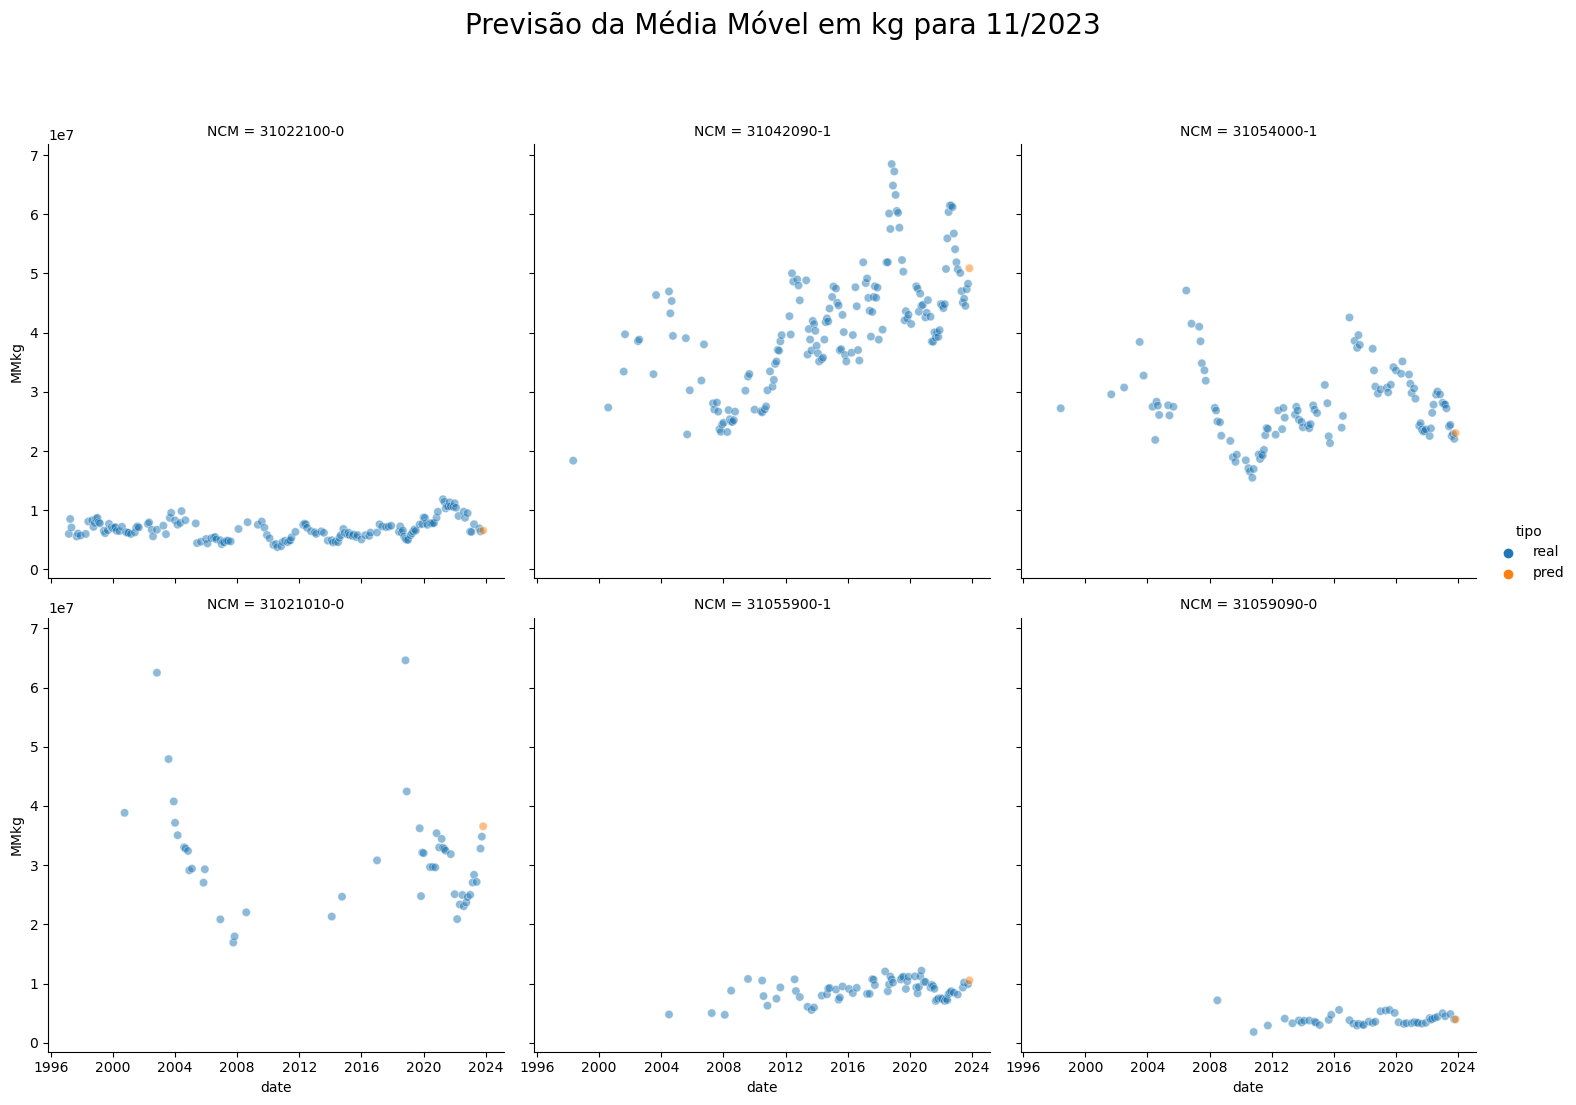

In [148]:
%run '~/comex/code/Visualiza Média Móvel Projetada.ipynb'